In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("dob_and_minutes.csv")
df

,name,year,minutes,dob
0,Abby Elinsky,2020 Fall Series,291.0,1996-01-08
1,Abby Elinsky,2019,548.0,1996-01-08
2,Abby Elinsky,2018,32.0,1996-01-08
3,Alex Chidiac,2022,960.0,1999-01-15
4,Andressinha,2019,438.0,1995-05-01
...,...,...,...,...
2190,Zoey Goralski,2020 Challenge Cup,253.0,1995-01-22
2191,Zoey Goralski,2019,59.0,1995-01-22
2192,Évelyne Viens,2021,321.0,1997-02-06
2193,Évelyne Viens,2021 Challenge Cup,39.0,1997-02-06


In [88]:
df["dob"] = pd.to_datetime(df["dob"])
df["dob_day"] = df["dob"].dt.day
df["dob_month"] = df["dob"].dt.month
df["dob_year"] = df["dob"].dt.year
df

,name,year,minutes,dob,dob_month,dob_year,dob_day
0,Abby Elinsky,2020 Fall Series,291.0,1996-01-08,1,1996,8
1,Abby Elinsky,2019,548.0,1996-01-08,1,1996,8
2,Abby Elinsky,2018,32.0,1996-01-08,1,1996,8
3,Alex Chidiac,2022,960.0,1999-01-15,1,1999,15
4,Andressinha,2019,438.0,1995-05-01,5,1995,1
...,...,...,...,...,...,...,...
2190,Zoey Goralski,2020 Challenge Cup,253.0,1995-01-22,1,1995,22
2191,Zoey Goralski,2019,59.0,1995-01-22,1,1995,22
2192,Évelyne Viens,2021,321.0,1997-02-06,2,1997,6
2193,Évelyne Viens,2021 Challenge Cup,39.0,1997-02-06,2,1997,6


In [75]:
def plot_data(bucket, metric, year=None):
    df_year = df if year == None else df[df["year"] == year]
    df_group = (
        df_year.groupby("dob_" + bucket)
        .agg(count=("name", "count"), minutes=("minutes", "sum"))
        .reset_index()
    )
    df_group[metric] = df_group[metric] / df_group[metric].sum()
    
    plt.bar(df_group["dob_" + bucket], df_group[metric])
    
    if bucket == "year":
        plt.xlim(df["dob_year"].min(), df["dob_year"].max())
        
    plt.ylim(0, 0.2)

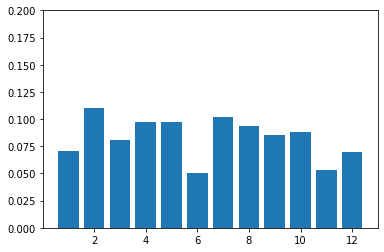

In [76]:
plot_data("month", "count")

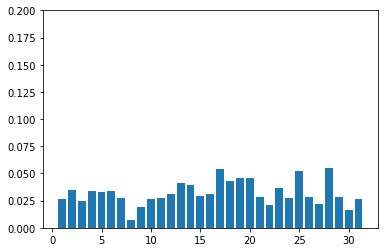

In [89]:
plot_data("day", "count")

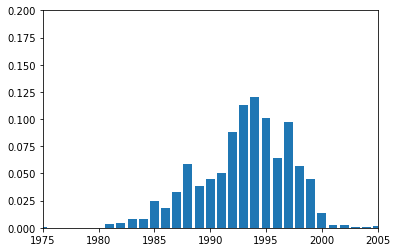

In [78]:
plot_data("year", "count")

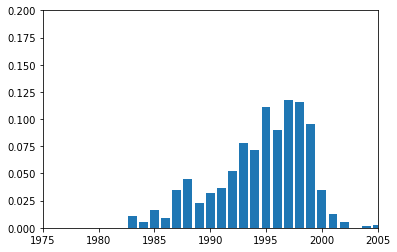

In [87]:
plot_data("year", "minutes", "2022")

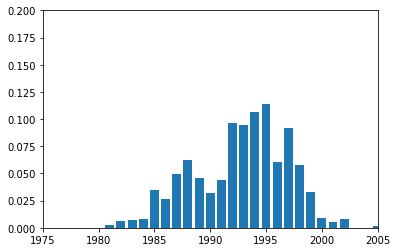

In [86]:
plot_data("year", "minutes", "2021")

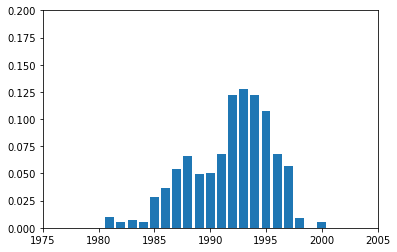

In [81]:
plot_data("year", "minutes", "2019")

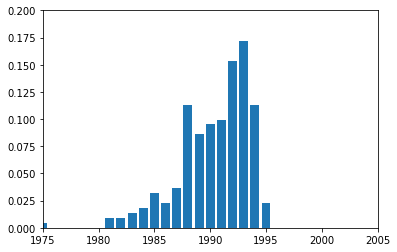

In [85]:
plot_data("year", "minutes", "2016")